# Task
Perform Exploratory Data Analysis (EDA) on the "Final Data Sheet.csv" file, including data loading and initial inspection, cleaning blank or invalid entries in 'Type of procedures', 'Anonymized Lot', and 'sequence number' columns, analyzing and visualizing 'Type of procedures', and visualizing Surgeon Experience distribution, analyzing and visualizing 'Remaining uses', exploring relationships between 'Remaining uses' and other key features, and summarizing the key findings.

## Load Data and Initial Inspection

Load the 'Final Data Sheet.csv' into a pandas DataFrame. Display the first few rows, column information, and basic descriptive statistics to understand the dataset's structure and contents.


In [ ]:
import pandas as pd

# Load the 'Final Data Sheet.csv' file into a pandas DataFrame
df = pd.read_csv('/content/Final Data Sheet.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
  Instrument Anonymized Lot  4 digit Seq Customer Lot Failure Date  \
0    INS-001         LOT001        190.0  LOT001-0190   12/18/2023   
1    INS-001         LOT002        488.0  LOT002-0488     1/2/2024   
2    INS-002         LOT003        283.0  LOT003-0283     1/2/2024   
3    INS-003         LOT004          9.0  LOT004-0009     1/2/2024   
4    INS-004         LOT005        245.0  LOT005-0245     1/2/2024   

                                  Type of Procedures  Remaining Uses  \
0  Salpingo-Oophorectomy|Prostatectomy - Radical ...               8   
1  Nephrectomy|Nephrectomy|Prostatectomy - Radica...               7   
2  Hysterectomy - Malignant|Hysterectomy - Benign...               5   
3  Hysterectomy - Malignant|Hysterectomy - Malign...               5   
4                  Hysterectomy - Benign|Nephrectomy              12   

   Experience of Surgeon who performed Last Surgery(in Years) Experience Level  
0                                 

## Perform Data Cleaning

Clean the data by dropping records where 'Type of procedures' is blank. Once done, it should also remove records where "Anonymized Lot" is missing or "4 digit Seq" is missing


In [ ]:
import numpy as np

initial_rows = df.shape[0]

# Drop rows where 'Type of Procedures' is NaN
df = df.dropna(subset=['Type of Procedures'])

# Display DataFrame info after cleaning to check for non-null counts
print("\nDataFrame Info after cleaning:")
df.info()


DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 951
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Instrument                                                  730 non-null    object 
 1   Anonymized Lot                                              730 non-null    object 
 2   4 digit Seq                                                 730 non-null    float64
 3   Customer Lot                                                730 non-null    object 
 4   Failure Date                                                730 non-null    object 
 5   Type of Procedures                                          730 non-null    object 
 6   Remaining Uses                                              730 non-null    int64  
 7   Experience of Surgeon who performed Last Surgery(in Years)  730

## Validate Data

Check the rows with blank/null/NA values in Type of Procedures, Anonymized Lot, 4 digit Seq columns. These should be 0

In [ ]:
import numpy as np

# Count rows where 'Type of Procedures' is NaN or 'Unknown'
blank_or_null_count = df['Type of Procedures'].isnull().sum() + (df['Type of Procedures'] == 'Unknown').sum()
print(f"Number of rows where 'Type of Procedures' is blank or null: {blank_or_null_count}")

# Count rows where 'Anonymized Lot' is NaN or 'Unknown'
blank_lot_count = df['Anonymized Lot'].isnull().sum() + (df['Anonymized Lot'] == 'Unknown').sum()
print(f"Number of rows where 'Anonymized Lot' is blank or null: {blank_lot_count}")

# Count rows where '4 digit Seq' is NaN or 'Unknown'
blank_seq_count = df['4 digit Seq'].isnull().sum() + (df['4 digit Seq'] == '0000').sum() + (df['4 digit Seq'] == 'NA').sum() + (df['4 digit Seq'] == 'N/A').sum()
print(f"Number of rows where '4 Digit Seq' is blank or null: {blank_seq_count}")

Number of rows where 'Type of Procedures' is blank or null: 0
Number of rows where 'Anonymized Lot' is blank or null: 0
Number of rows where '4 Digit Seq' is blank or null: 0


## Process Type of Procedures

Analyze the 'Type of procedures' column. This involves splitting the pipe-separated values, counting the occurrences of each unique procedure, and visualizing the most frequent procedures using a bar chart with appropriate legends.


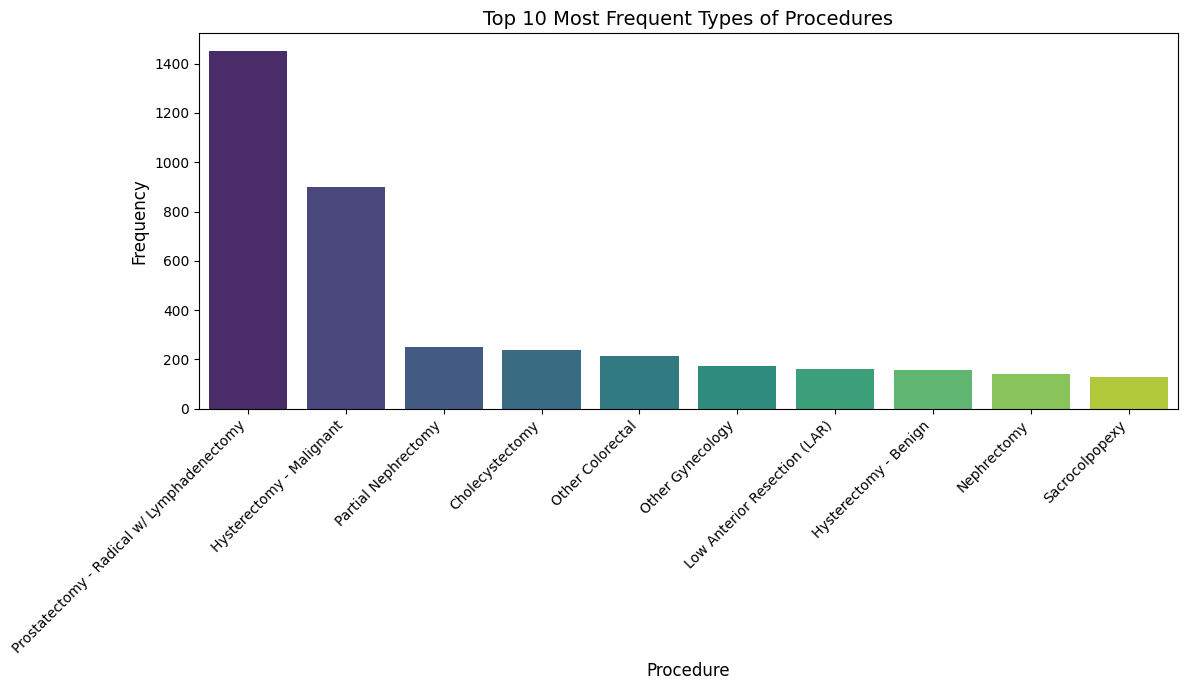

Prostatectomy - Radical w/ Lymphadenectomy    1450
Hysterectomy - Malignant                       900
Partial Nephrectomy                            250
Cholecystectomy                                238
Other Colorectal                               216
                                              ... 
Component Separation TAR                         1
Gastrectomy - Proximal                           1
Nissen Fundoplication - Redo                     1
Gastrojejunostomy                                1
Gastrectomy - Wedge Resection                    1
Name: count, Length: 115, dtype: int64
Displaying the top 10 most frequent procedures.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'Type of Procedures' column by the pipe ('|') delimiter
# and expand into separate columns
procedures_split = df['Type of Procedures'].str.split('|', expand=True)

# Stack the resulting DataFrame to transform from wide to long format
# This creates a single Series of all individual procedures
all_procedures = procedures_split.stack()

# Drop any rows that resulted in NaN (empty procedures due to varying lengths)
all_procedures = all_procedures.dropna()

# Count the occurrences of each unique procedure
procedure_counts = all_procedures.value_counts()

# Select the top 10 most frequent procedures for visualization
top_n = 10
top_procedures = procedure_counts.head(top_n)

# Set the figure size for better readability
plt.figure(figsize=(12, 7))

# Create a bar chart using seaborn.barplot
sns.barplot(x=top_procedures.index, y=top_procedures.values, hue=top_procedures.index, palette='viridis', legend=False)

# Add labels and title
plt.xlabel('Procedure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Top {top_n} Most Frequent Types of Procedures', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a tight layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

print(procedure_counts)
print(f"Displaying the top {top_n} most frequent procedures.")

## Categorize Surgeon Experience

Visualize the distribution Surgeon Experience using a count plot or bar chart with appropriate legends.


Distribution of 'Experience Level':
Experience Level
M    343
H    313
L     74
Name: count, dtype: int64


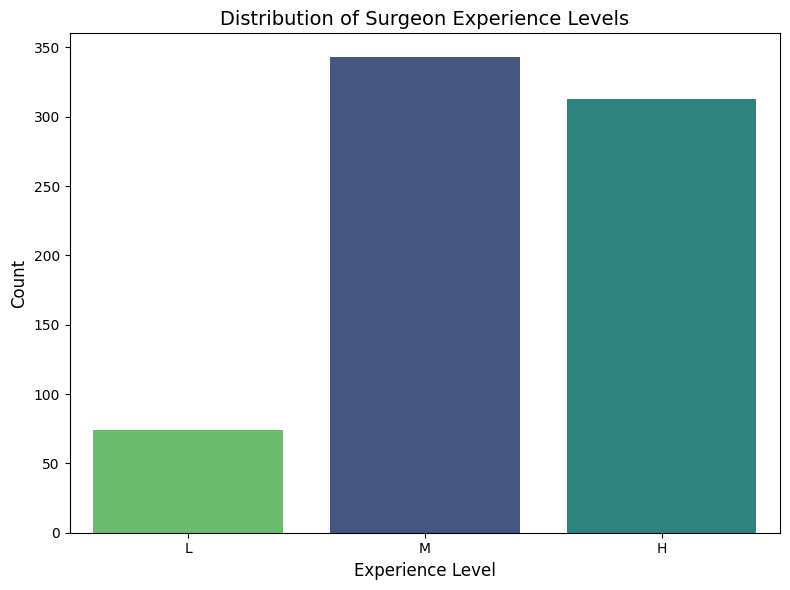

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the value counts for the new column to verify the categorization
print("Distribution of 'Experience Level':")
print(df['Experience Level'].value_counts())

# Visualize the distribution of 'Experience Level Categorized'
plt.figure(figsize=(8, 6))
sns.countplot(x='Experience Level', data=df, palette='viridis', order=['L', 'M', 'H'], hue='Experience Level', legend=False)
plt.title('Distribution of Surgeon Experience Levels', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Explore Relationships

Investigate potential relationships between 'Remaining uses' and other key categorical features like 'Experience of surgeon' and the most common 'Type of procedures'. This can be done using box plots or grouped bar charts, ensuring all visualizations have clear labels and legends.


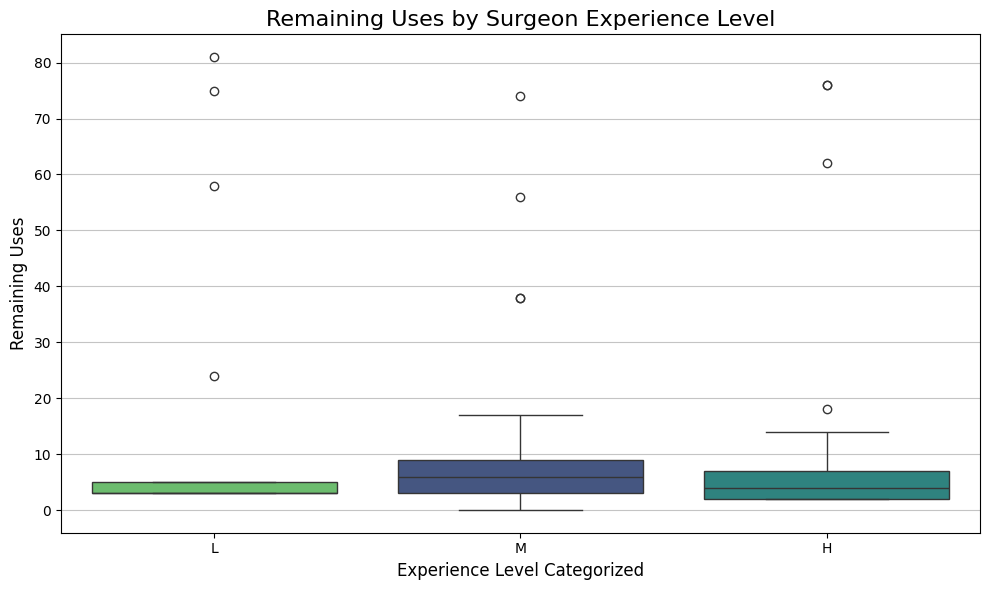

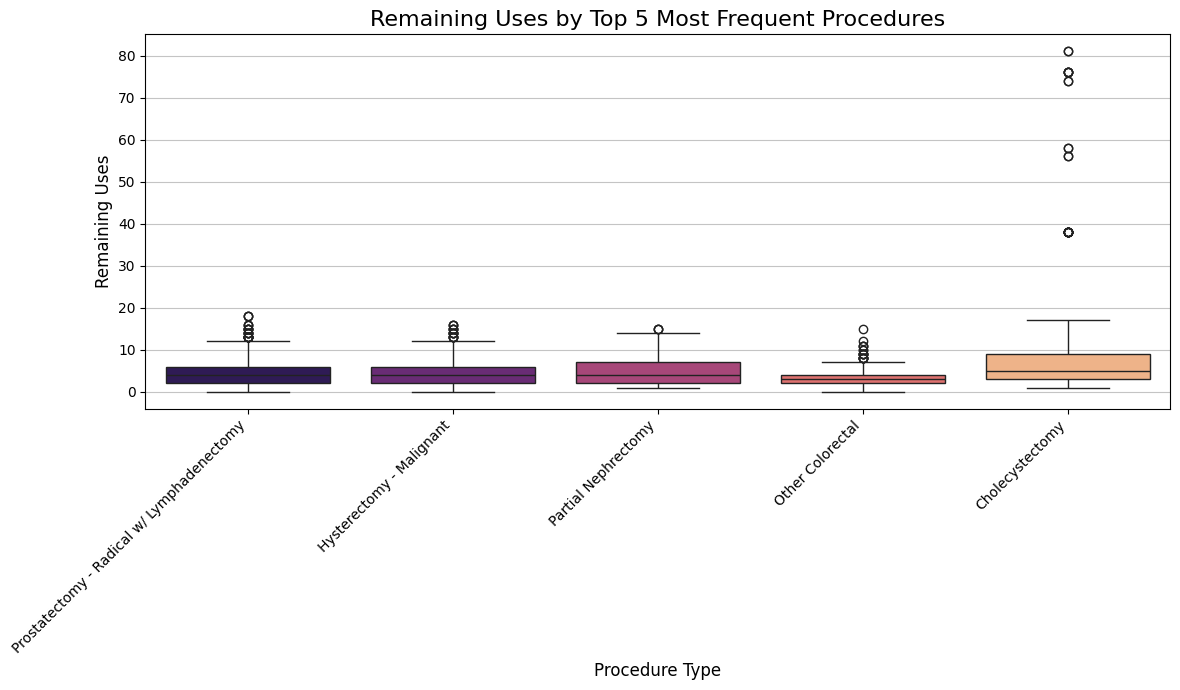

Generated box plots for 'Remaining Uses' against 'Experience Level Categorized' and the top 5 'Type of Procedures'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot for 'Remaining Uses' vs. 'Experience Level Categorized'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience Level', y='Remaining Uses', data=df, palette='viridis', order=['L', 'M', 'H'], hue='Experience Level', legend=False)
plt.title('Remaining Uses by Surgeon Experience Level', fontsize=16)
plt.xlabel('Experience Level Categorized', fontsize=12)
plt.ylabel('Remaining Uses', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 2. Identify the top 5 most frequent procedures
top_5_procedures = top_procedures.head(5).index.tolist()

# 3. Filter the DataFrame to include only rows with these top 5 procedures
# Explode the 'Type of Procedures' column so each procedure gets its own row
df_procedures_exploded = df.assign(Individual_Procedure=df['Type of Procedures'].str.split('|')).explode('Individual_Procedure')

# Filter to include only the top 5 procedures
df_filtered_for_top_5_procedures = df_procedures_exploded[df_procedures_exploded['Individual_Procedure'].isin(top_5_procedures)]

# 4. Create a box plot for 'Remaining Uses' vs. filtered 'Type of Procedures'
plt.figure(figsize=(12, 7))
sns.boxplot(x='Individual_Procedure', y='Remaining Uses', data=df_filtered_for_top_5_procedures, palette='magma', hue='Individual_Procedure', legend=False)
plt.title('Remaining Uses by Top 5 Most Frequent Procedures', fontsize=16)
plt.xlabel('Procedure Type', fontsize=12)
plt.ylabel('Remaining Uses', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

print("Generated box plots for 'Remaining Uses' against 'Experience Level Categorized' and the top 5 'Type of Procedures'.")

## Analyze Procedure Types for Early Defects

Identify specific procedure types that are disproportionately associated with instruments having high 'Remaining Uses' at the time of failure (indicating early defects). This will involve calculating a threshold for 'high Remaining Uses' (e.g., 75th percentile), filtering the data to find such instances, and then analyzing and visualizing the most frequent procedures in this filtered subset using a bar chart.

Calculate the 75th percentile of the 'Remaining Uses' column to define 'high Remaining Uses'. Then, filter the DataFrame to include only records where 'Remaining Uses' exceeds this threshold. For this filtered data, extract and count individual procedure types, similar to the previous procedure analysis, and then visualize the top frequent procedures using a bar chart. This will highlight procedures potentially associated with early defects.

75th percentile of 'Remaining Uses': 8.0
Number of records with 'Remaining Uses' > 8.0: 175


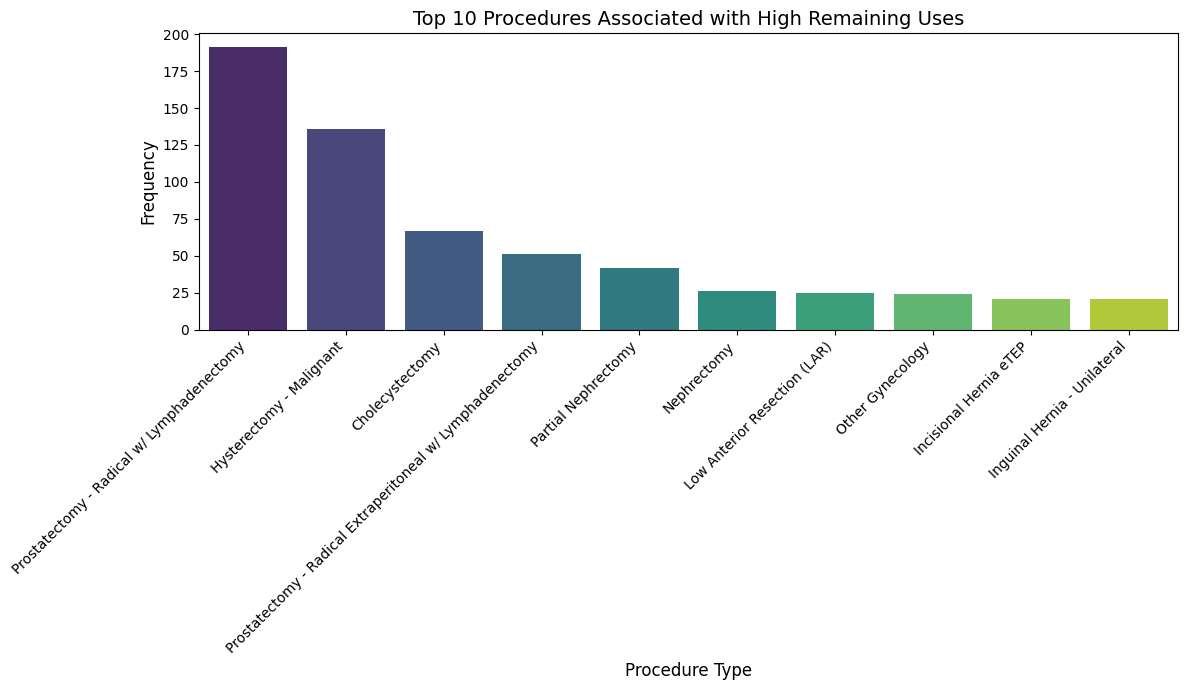

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the 75th percentile of the 'Remaining Uses' column
high_uses_threshold = df['Remaining Uses'].quantile(0.75)
print(f"75th percentile of 'Remaining Uses': {high_uses_threshold}")

# 2. Filter the DataFrame to include only records where 'Remaining Uses' is greater than high_uses_threshold
df_high_remaining_uses = df[df['Remaining Uses'] > high_uses_threshold]
print(f"Number of records with 'Remaining Uses' > {high_uses_threshold}: {df_high_remaining_uses.shape[0]}")

# 3. Split the 'Type of Procedures' column by the pipe ('|') delimiter
procedures_split_high_uses = df_high_remaining_uses['Type of Procedures'].str.split('|', expand=True)

# 4. Stack the resulting DataFrame to transform into a single Series
all_procedures_high_uses = procedures_split_high_uses.stack()

# 5. Drop any NaN values from this Series
all_procedures_high_uses = all_procedures_high_uses.dropna()

# 6. Count the occurrences of each unique procedure and identify the top 10
procedure_counts_high_uses = all_procedures_high_uses.value_counts()
top_n_high_uses = 10
top_procedures_high_uses = procedure_counts_high_uses.head(top_n_high_uses)

# 7. Create a bar chart using seaborn.barplot to visualize these top procedures
plt.figure(figsize=(12, 7))
sns.barplot(x=top_procedures_high_uses.index, y=top_procedures_high_uses.values, hue=top_procedures_high_uses.index, palette='viridis', legend=False)

# 8. Add appropriate labels and title
plt.title(f'Top {top_n_high_uses} Procedures Associated with High Remaining Uses', fontsize=14)
plt.xlabel('Procedure Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# 9. Display the plot
plt.tight_layout()
plt.show()

## Data Analysis Key Findings
*   The threshold for defining 'high Remaining Uses' was set at the 75th percentile, which was calculated to be 8.0 uses.
*   There were 175 records where instruments failed with 'Remaining Uses' greater than 8.0, indicating early defects.
*   The analysis identified and visualized the top 10 most frequent procedure types associated with these 175 instances of early instrument failure.


## Analyze Combined Factors and Remaining Uses

First, one-hot encode the individual procedures from the 'Type of Procedures' column. Then, explore potential correlations between these one-hot encoded procedure types, the 'Experience Level' of the surgeon, and the 'Remaining Uses' of the instruments. This may involve statistical tests or correlation matrices, and visualizing key relationships through heatmaps or grouped visualizations.


In [ ]:
import pandas as pd

# 1. One-hot encode the 'Individual_Procedure' column from df_procedures_exploded

# Before one-hot encoding, clean up any empty or whitespace-only strings
# in 'Individual_Procedure' that might have resulted from splitting
df_procedures_exploded_cleaned = df_procedures_exploded[df_procedures_exploded['Individual_Procedure'].str.strip() != ''].copy()

print(f"Number of unique procedures before cleaning for one-hot encoding: {df_procedures_exploded['Individual_Procedure'].nunique()}")
print(f"Number of unique procedures after cleaning for one-hot encoding: {df_procedures_exploded_cleaned['Individual_Procedure'].nunique()}")

one_hot_procedures = pd.get_dummies(df_procedures_exploded_cleaned['Individual_Procedure'], prefix='Procedure')

# 2. Group by the index of 'one_hot_procedures' (which is the original index from df, repeated)
# and sum the one-hot encoded columns. This consolidates the one-hot encoded procedures
# back to the original row level, resulting in a DataFrame with unique indices that align with df.
one_hot_procedures_aggregated = one_hot_procedures.groupby(one_hot_procedures.index).sum()

# Identify all existing 'Procedure_' columns in df, regardless of suffix, and drop them
existing_procedure_cols = [col for col in df.columns if col.startswith('Procedure_')]
if existing_procedure_cols:
    df = df.drop(columns=existing_procedure_cols)

# 3. Merge the resulting DataFrame with the main DataFrame df using the DataFrame's index
# Since conflicting columns are dropped, a simple left merge should now work without suffix issues.
df = df.merge(one_hot_procedures_aggregated, left_index=True, right_index=True, how='left')

# Fill NaN values in the newly merged one-hot encoded columns with 0
# (for rows in df that might not have had any procedures after cleaning or were not in df_procedures_exploded)
df[one_hot_procedures_aggregated.columns] = df[one_hot_procedures_aggregated.columns].fillna(0)

# Ensure the one-hot encoded columns are integer type
df[one_hot_procedures_aggregated.columns] = df[one_hot_procedures_aggregated.columns].astype(int)

# 4. Display the head and info of the updated df
print("\nFirst 5 rows of the DataFrame after one-hot encoding procedures:")
print(df.head())

print("\nDataFrame Info after one-hot encoding procedures:")
df.info()

Number of unique procedures before cleaning for one-hot encoding: 115
Number of unique procedures after cleaning for one-hot encoding: 115

First 5 rows of the DataFrame after one-hot encoding procedures:
  Instrument Anonymized Lot  4 digit Seq Customer Lot Failure Date  \
0    INS-001         LOT001        190.0  LOT001-0190   12/18/2023   
1    INS-001         LOT002        488.0  LOT002-0488     1/2/2024   
2    INS-002         LOT003        283.0  LOT003-0283     1/2/2024   
3    INS-003         LOT004          9.0  LOT004-0009     1/2/2024   
4    INS-004         LOT005        245.0  LOT005-0245     1/2/2024   

                                  Type of Procedures  Remaining Uses  \
0  Salpingo-Oophorectomy|Prostatectomy - Radical ...               8   
1  Nephrectomy|Nephrectomy|Prostatectomy - Radica...               7   
2  Hysterectomy - Malignant|Hysterectomy - Benign...               5   
3  Hysterectomy - Malignant|Hysterectomy - Malign...               5   
4             

In [ ]:
print(f"Number of columns in one_hot_procedures_aggregated: {one_hot_procedures_aggregated.shape[1]}")
print(f"Number of columns in df: {df.shape[1]}")
print(f"Number of unique procedures in the cleaned data: {df_procedures_exploded_cleaned['Individual_Procedure'].nunique()}")

Number of columns in one_hot_procedures_aggregated: 115
Number of columns in df: 124
Number of unique procedures in the cleaned data: 115


##Next Step:
Now that the procedures are one-hot encoded and merged into the main DataFrame, let's calculate the correlations between 'Remaining Uses' and the one-hot encoded procedure columns, as well as the 'Experience Level' column. Then visualize these correlations using a heatmap to identify key relationships.



/tmp/ipython-input-2179404523.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Experience Level Categorized_numeric'] = df['Experience Level'].map({'L': 1, 'M': 2, 'H': 3})
/tmp/ipython-input-2179404523.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=visualize_corr.index, y=visualize_corr.values, palette='coolwarm')


Top 10 positive correlations with 'Remaining Uses':

Remaining Uses                                               1.000000
Procedure_Component Separation TAR                           0.351186
Procedure_Other Thoracic                                     0.240566
Procedure_Pulmonary Segmentectomy                            0.236635
Procedure_Esophagectomy Transthoracic - Chest Anastomosis    0.235911
Procedure_Mediastinal Mass Resection                         0.218019
Procedure_Pancreatoduodenectomy                              0.211454
Procedure_Pulmonary Lobectomy                                0.204458
Procedure_Pancreatectomy - Distal                            0.175791
Procedure_Cholecystectomy                                    0.147521
Procedure_Kidney Reimplantation - Living Donor               0.138333
Name: Remaining Uses, dtype: float64

Top 10 negative correlations with 'Remaining Uses':

Procedure_Rectopexy                                    -0.080945
Procedure_Other Gynec

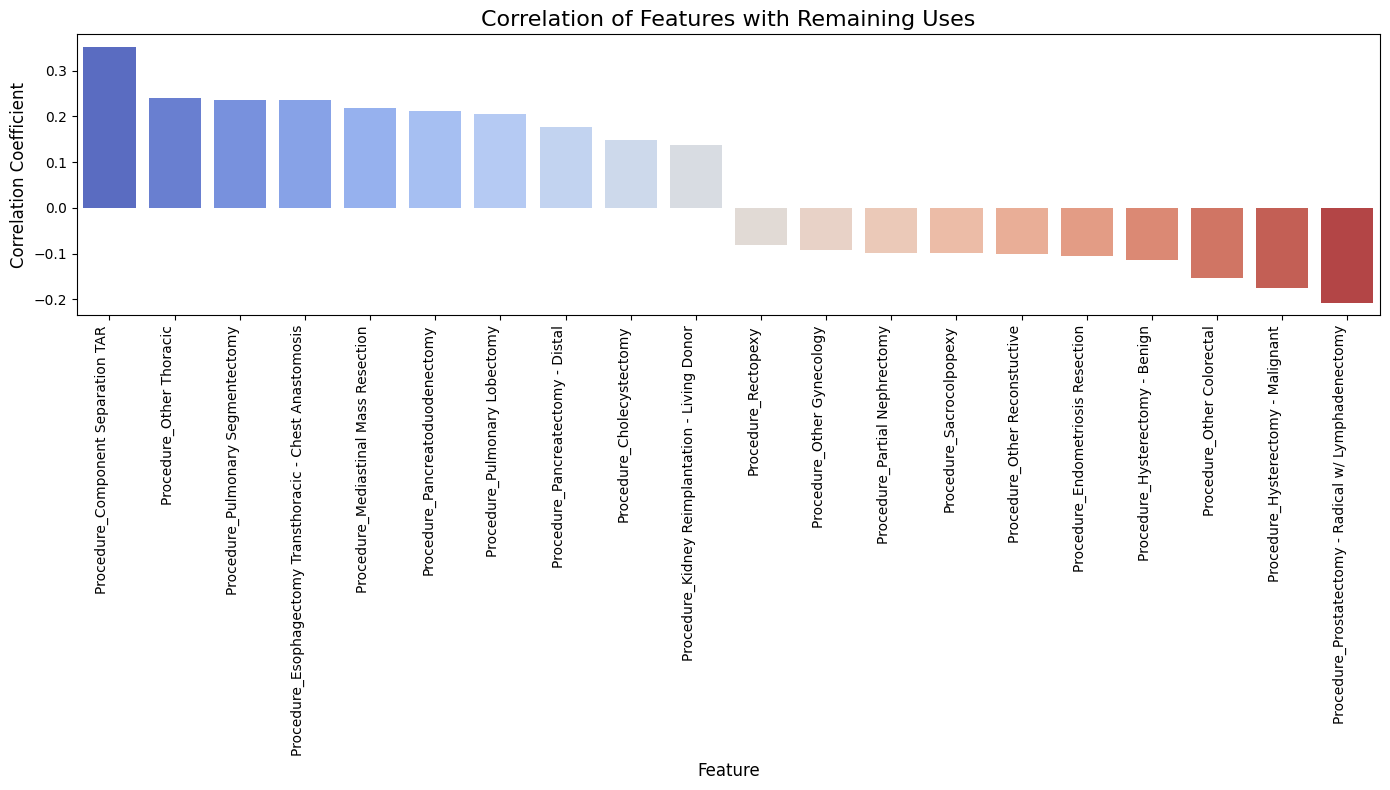

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for correlation analysis
# Convert 'Experience Level Categorized' to numerical representation for correlation calculation
df['Experience Level Categorized_numeric'] = df['Experience Level'].map({'L': 1, 'M': 2, 'H': 3})

# Select numerical columns for correlation, including 'Remaining Uses', 'Experience Level Categorized_numeric'
# and all one-hot encoded procedure columns.
# Identify all one-hot encoded procedure columns dynamically
procedure_cols = [col for col in df.columns if col.startswith('Procedure_')]

# Combine with 'Remaining Uses' and the numerical experience level
correlation_cols = ['Remaining Uses', 'Experience Level Categorized_numeric'] + procedure_cols

# Calculate the correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Focus on correlations with 'Remaining Uses'
correlation_with_remaining_uses = correlation_matrix['Remaining Uses'].sort_values(ascending=False)

print("Top 10 positive correlations with 'Remaining Uses':\n")
print(correlation_with_remaining_uses.head(11)) # Include 'Remaining Uses' itself

print("\nTop 10 negative correlations with 'Remaining Uses':\n")
print(correlation_with_remaining_uses.tail(10))

# Visualize top correlations with 'Remaining Uses' for procedures
# Exclude 'Remaining Uses' itself from the plot
plot_corr = correlation_with_remaining_uses.drop('Remaining Uses')

# Select top N positive and negative correlations for visualization
top_n_corr = 10
visualize_corr = pd.concat([plot_corr.head(top_n_corr), plot_corr.tail(top_n_corr)])

plt.figure(figsize=(14, 8))
sns.barplot(x=visualize_corr.index, y=visualize_corr.values, palette='coolwarm')
plt.title('Correlation of Features with Remaining Uses', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Data Analysis Key Findings

*   **Procedure One-Hot Encoding:** Individual procedures were successfully one-hot encoded and integrated into the main DataFrame, adding 115 new columns representing different procedure types.
*   **Correlations with Remaining Uses:** A correlation analysis was performed to identify relationships between 'Remaining Uses', surgeon experience level, and individual procedure types.
    *   **Strongest Positive Correlation:** The procedure 'Component Separation TAR' showed the strongest positive correlation with 'Remaining Uses' at 0.351. This suggests instruments used in this procedure tend to have higher remaining uses.
    *   **Strongest Negative Correlation:** The procedure 'Prostatectomy - Radical w/ Lymphadenectomy' exhibited the strongest negative correlation with 'Remaining Uses' at -0.207. This indicates instruments used in this procedure tend to have fewer remaining uses.
*   **Surgeon Experience:** The 'Experience Level Categorized' was converted to a numerical scale (L: 1, M: 2, H: 3) for correlation analysis with 'Remaining Uses'.


## Develop a Baseline ML Model

### Feature Engineering for ML Model

One-hot encode 'Experience Level' and 'Instrument' columns to prepare them for the machine learning model. Then, combine these with the existing one-hot encoded procedure columns to form the complete feature set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# Make a copy of the DataFrame to avoid modifying the original 'df'
df_model = df.copy()

# One-hot encode 'Experience Level'
one_hot_experience = pd.get_dummies(df_model['Experience Level'], prefix='Experience')
df_model = pd.concat([df_model, one_hot_experience], axis=1)

# One-hot encode 'Instrument'
one_hot_instrument = pd.get_dummies(df_model['Instrument'], prefix='Instrument')
df_model = pd.concat([df_model, one_hot_instrument], axis=1)

# Define features (X) and target (y)
# Features include one-hot encoded procedures, one-hot encoded experience level, and one-hot encoded instrument.
procedure_cols = [col for col in df_model.columns if col.startswith('Procedure_')]
experience_cols = [col for col in df_model.columns if col.startswith('Experience_')]
instrument_cols = [col for col in df_model.columns if col.startswith('Instrument_')]

# Combine all feature column names
feature_cols = procedure_cols + experience_cols + instrument_cols
X = df_model[feature_cols]
y = df_model['Remaining Uses']

print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of target vector (y): {y.shape}")
print(f"Number of features: {X.shape[1]}")

# Display the first few rows of the feature matrix
print("\nFirst 5 rows of the feature matrix (X):")
print(X.head())

Shape of feature matrix (X): (730, 169)
Shape of target vector (y): (730,)
Number of features: 169

First 5 rows of the feature matrix (X):
   Procedure_Abdominoperineal Resection (APR)  Procedure_Adrenalectomy  \
0                                           0                        0   
1                                           0                        0   
2                                           0                        0   
3                                           0                        0   
4                                           0                        0   

   Procedure_Appendectomy  Procedure_Bariatric Revision  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

   Procedure_Cholecystectomy  Procedure_Cholecystectomy - Pe

### Split Data and Train Baseline Model

Split the data into training and testing sets, then train a RandomForestRegressor model to predict 'Remaining Uses'.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape, y_train.shape}")
print(f"Testing set shape: {X_test.shape, y_test.shape}")

# Initialize and train the RandomForestRegressor model
# Using a small number of estimators for a baseline to keep computation fast
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

print("\nRandomForestRegressor model trained successfully.")

Training set shape: ((584, 169), (584,))
Testing set shape: ((146, 169), (146,))

RandomForestRegressor model trained successfully.


### Evaluate Baseline Model Performance

Evaluate the trained model's performance on the test set using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared to understand its accuracy.

Mean Absolute Error (MAE): 2.242
Root Mean Squared Error (RMSE): 4.630
R-squared (R2): 0.636


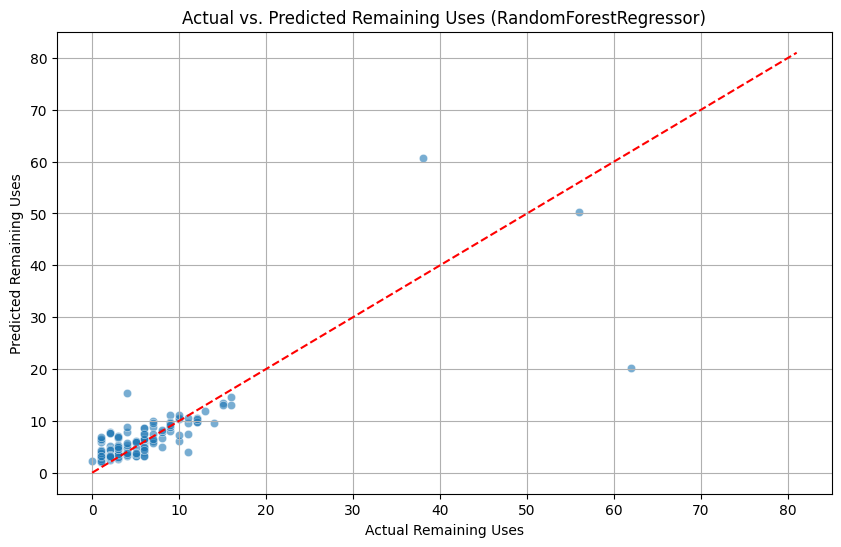

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

# Optionally, visualize predictions vs actual values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Red dashed line for ideal prediction
plt.xlabel('Actual Remaining Uses')
plt.ylabel('Predicted Remaining Uses')
plt.title('Actual vs. Predicted Remaining Uses (RandomForestRegressor)')
plt.grid(True)
plt.show()
